In [1]:

from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save

In [10]:
hists = load('lep_monotop_v1_2018_btag_trgg_sf.scaled')
data={
    '2018':{
        'sre': 'EGamma',
        'srm': 'MET',
        'wjetm': 'MET',
        'ttbarm': 'MET',
        'wjete': 'EGamma',
        'ttbare': 'EGamma',
#         'zmcr': 'MET',
#         'zecr': 'EGamma',
#         'gcr': 'EGamma'
    }
}

data_hists   = hists['data']
bkg_hists    = hists['bkg']
signal_hists = hists['sig']

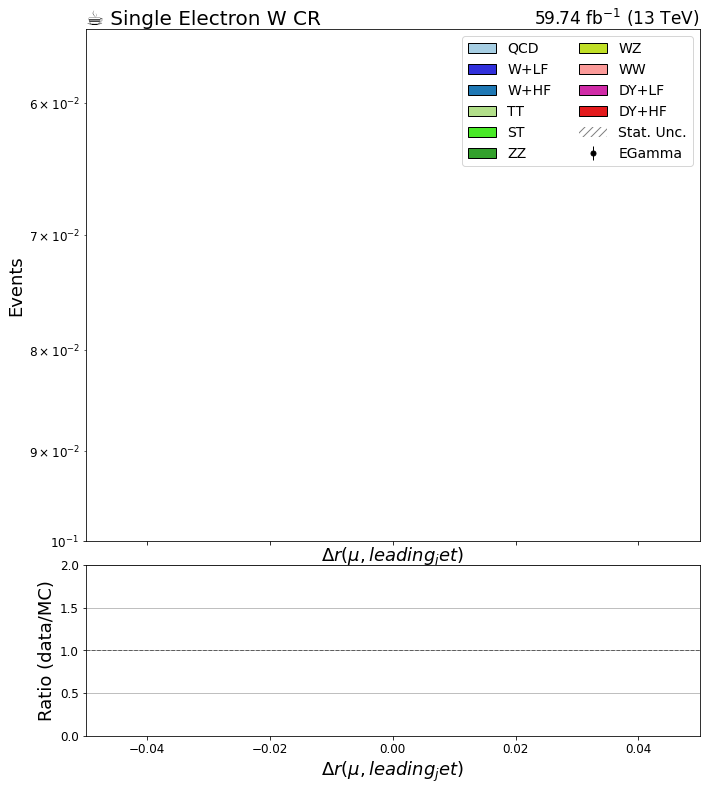

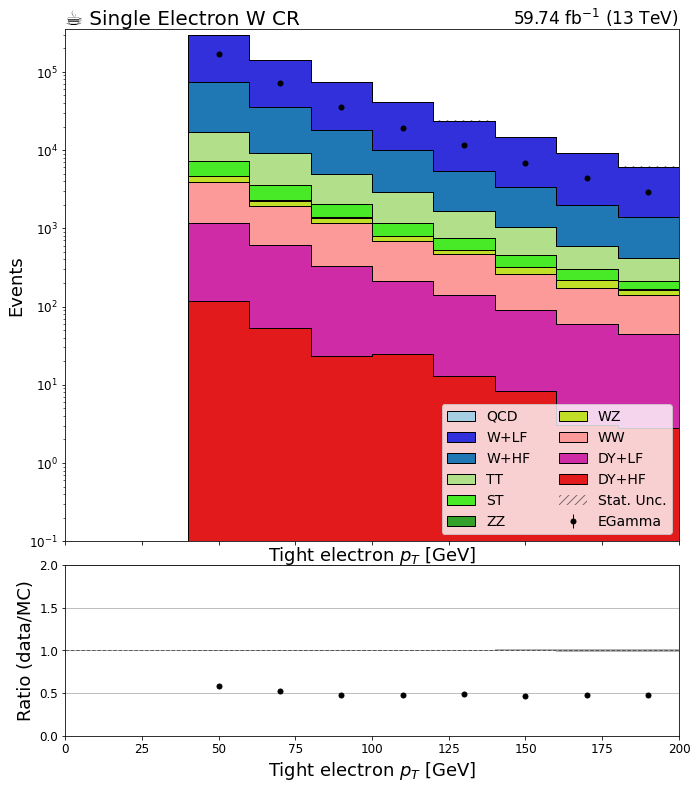

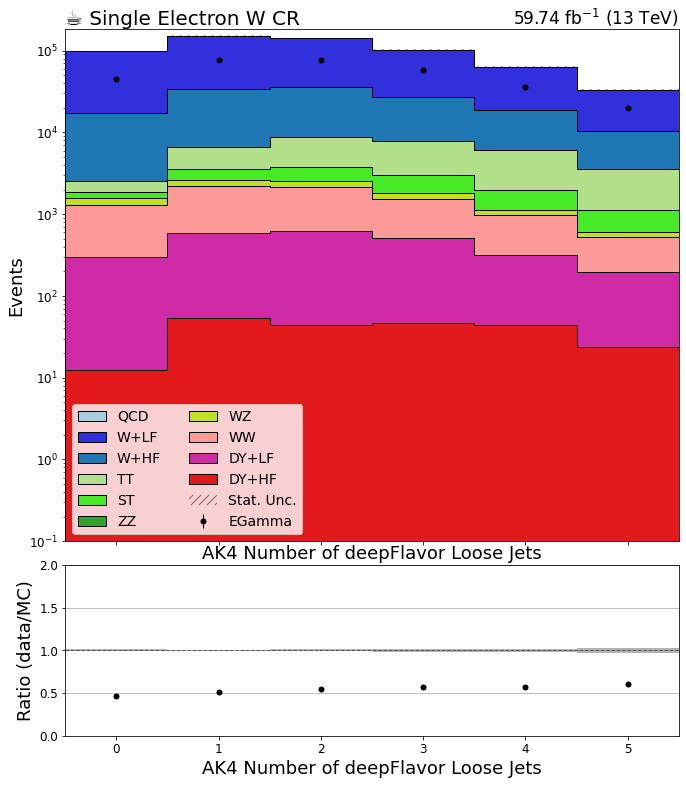

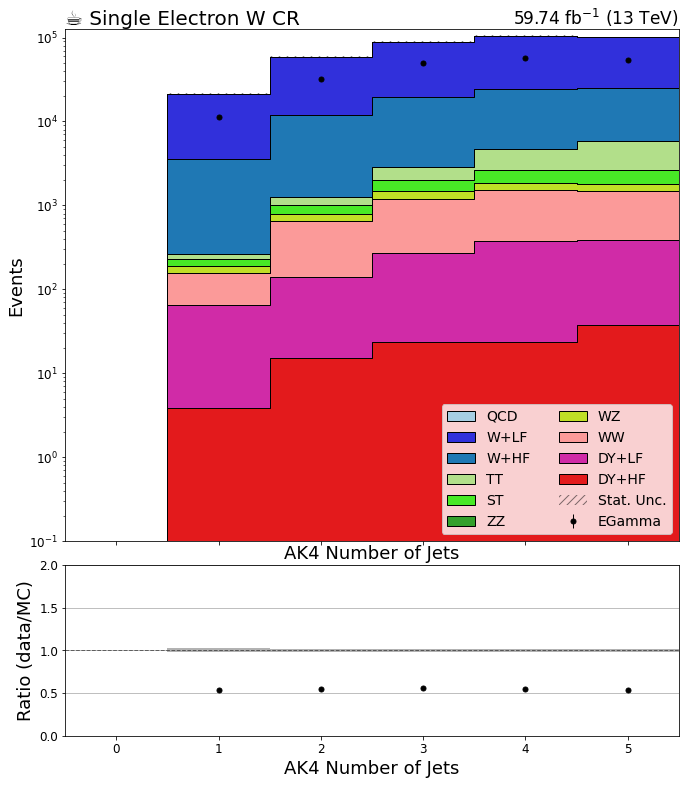

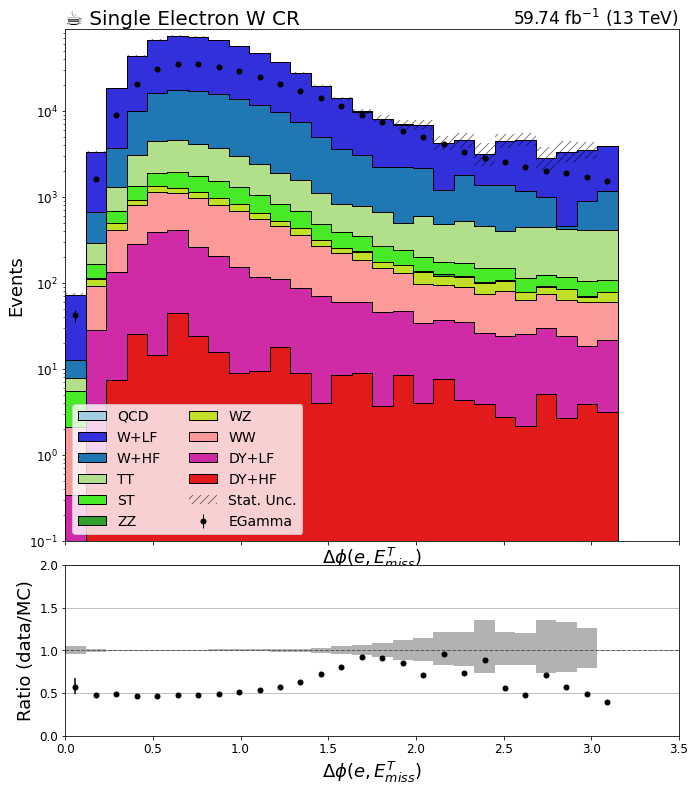

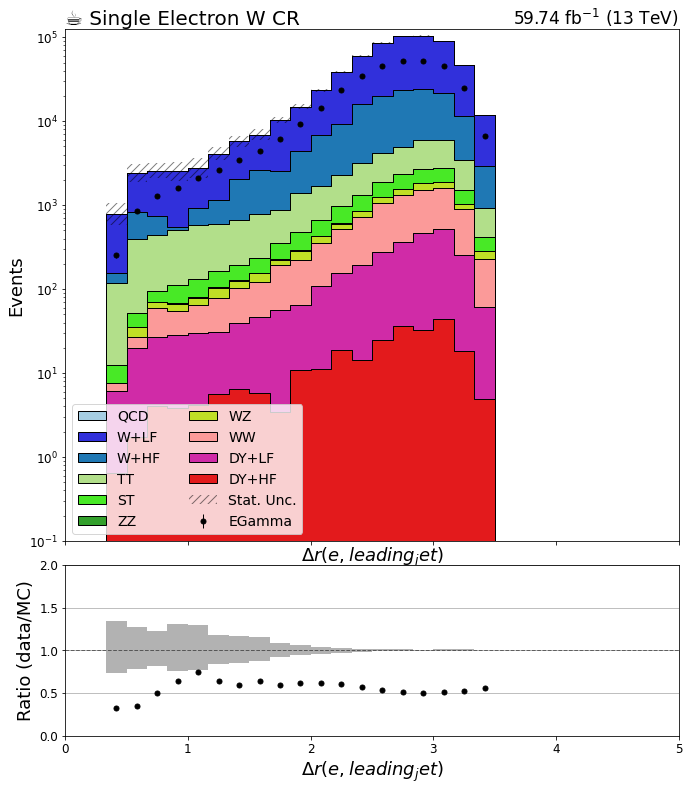

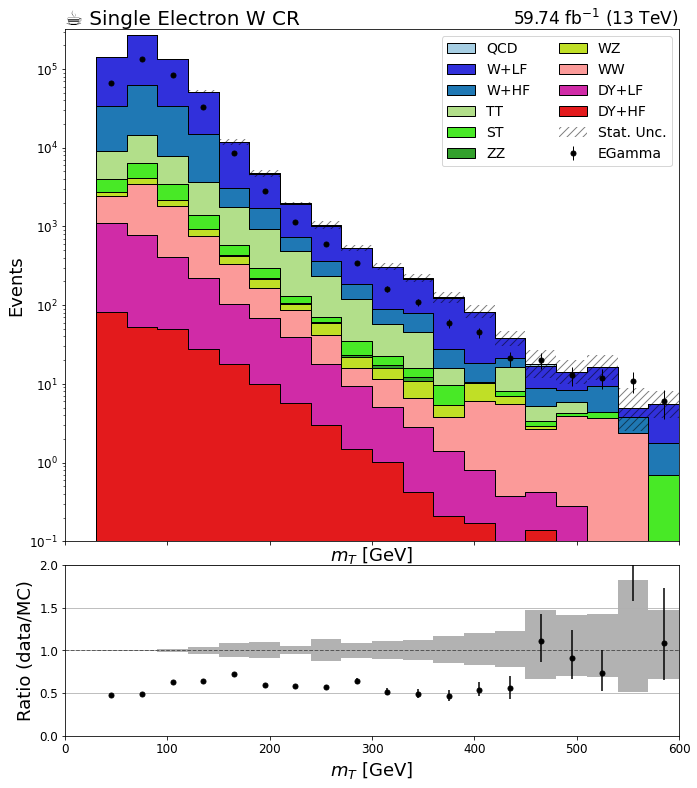

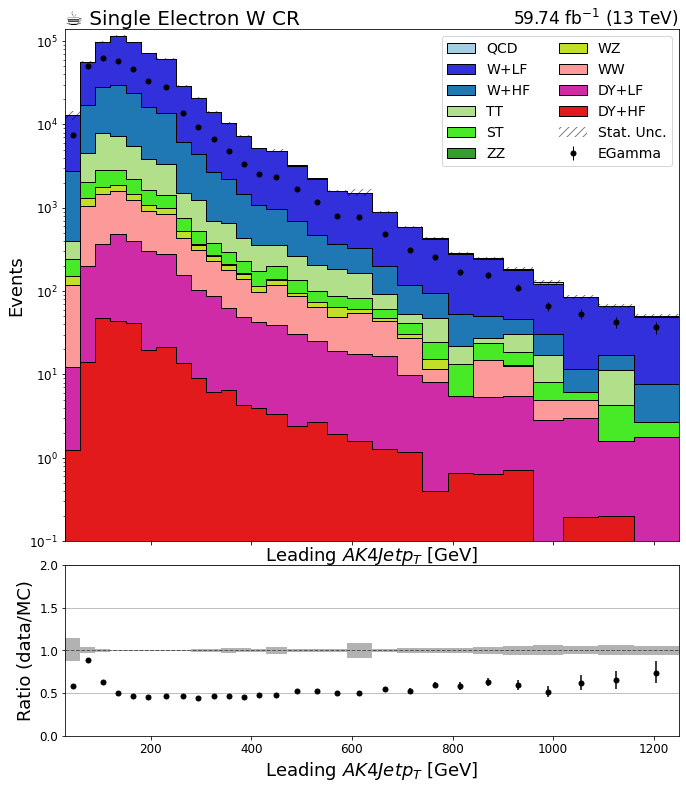

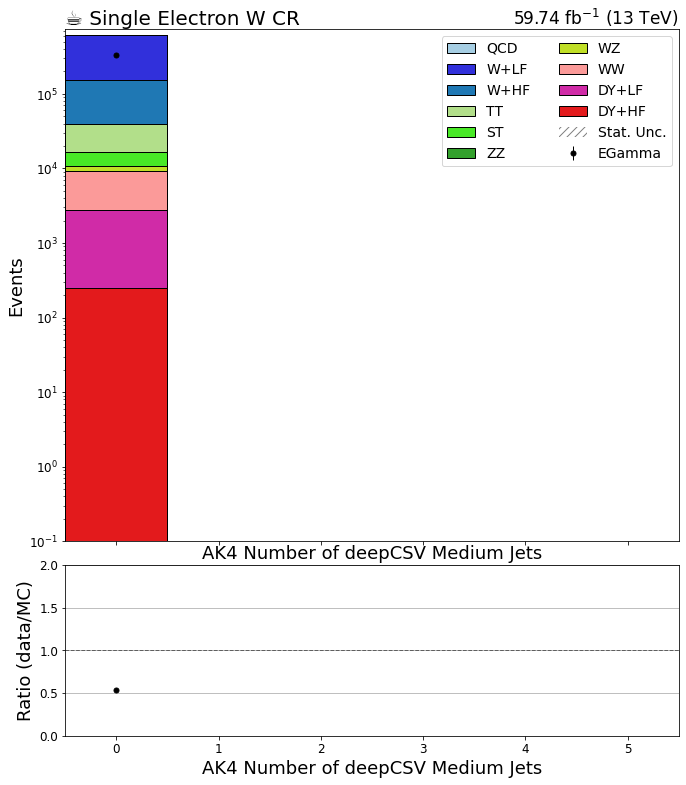

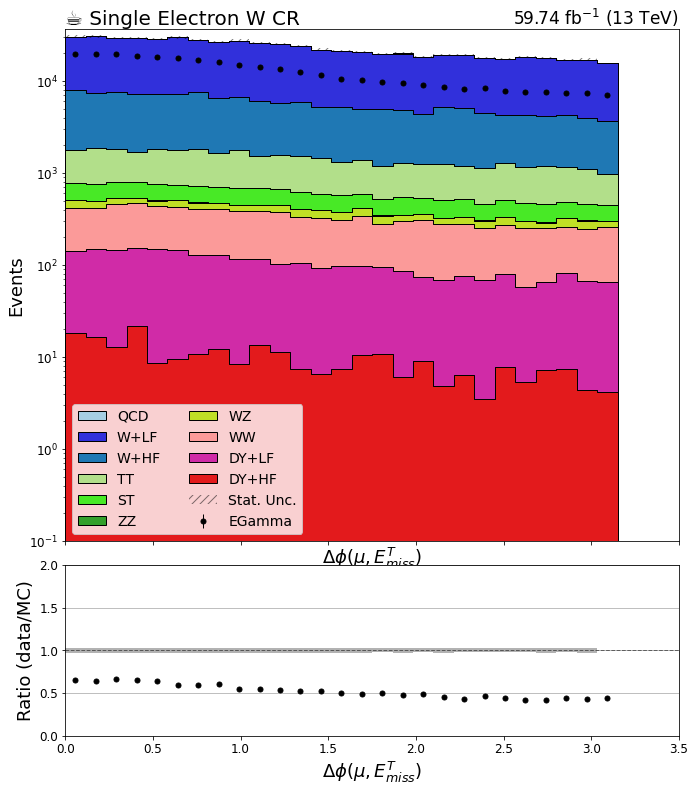

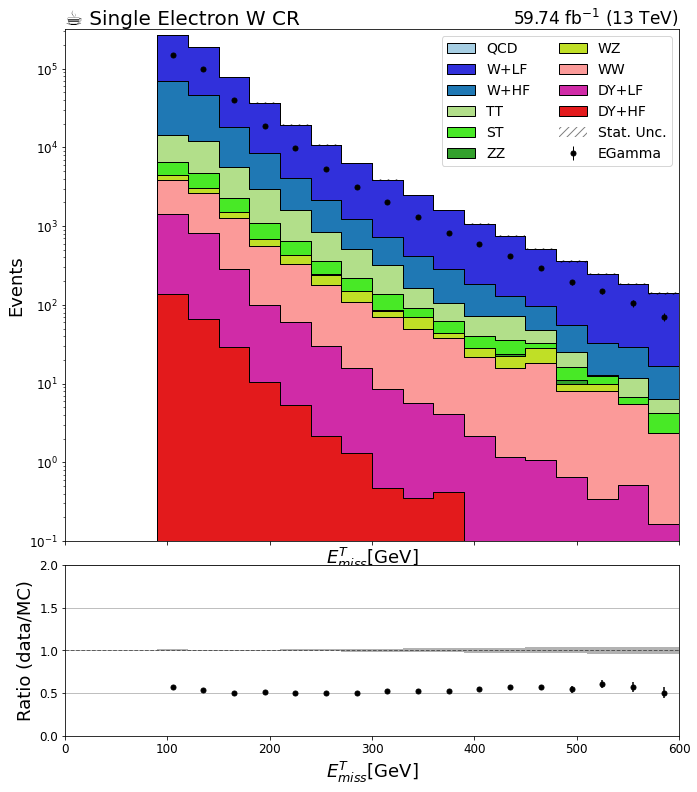

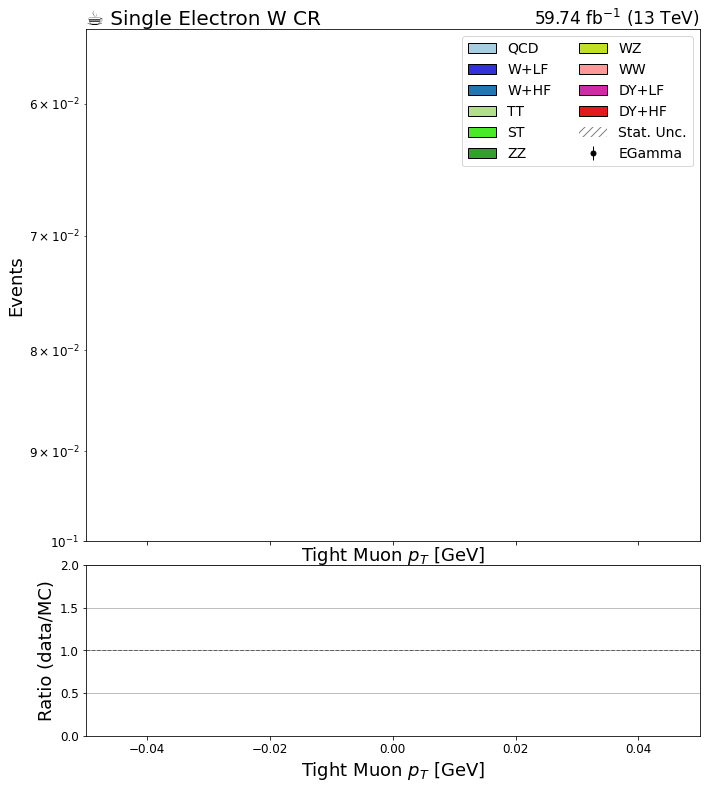

In [11]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler
year = '2018'
region = 'wjete'
sys = 'nominal'



# if not os.path.exists('../plots'):
#     os.makedirs('../plots')
R = {}
R['sre'] = 'Signal Region Electron'
R['srm'] = 'Signal Region Muon'
R['wjetm'] = 'Single Muon W CR'
R['ttbarm'] = 'Single Muon Top CR'
R['wjete'] = 'Single Electron W CR'
R['ttbare'] = 'Single Electron Top CR'
# R['zecr'] = 'Double Electron Z CR'
# R['zmcr'] = 'Double Muon Z CR'
# R['gcr'] = 'Single Photon CR'

for key in bkg_hists.keys():
    if key=='sumw': continue
    if key=='template': continue
    if key=='cutflow': continue
    #if key!='fjmass': continue
    for j in bkg_hists[key].identifiers('region'):
        if not (str(j) == region): continue
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
        colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
                  '#fb9a99', '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4',
                  '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']


        fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))
        
       
        plot.plot1d(data_hists[key].integrate('region',j)[data[year][str(j)]],            
                overlay="process",
                ax=ax,
                clear=False,
                error_opts=data_err_opts
                   )

        plot.plot1d(bkg_hists[key].integrate('region',j),
                overlay="process",
                ax=ax,
                clear=False,
                stack=True,
                fill_opts=fill_opts,
                error_opts=error_opts
                   )
        
        plot.plotratio(data_hists[key].integrate('region',j).integrate('process',data[year][str(j)]), 
                   bkg_hists[key].integrate('region',j).sum('process'),
                   ax=rax,
                   #overflow='over',
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )
        
        rax.set_ylabel('Ratio (data/MC)')
        rax.set_ylim(0.0,2.0)
        rax.grid(axis='y')
        
        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        if(key=='dilepmass'): ax.set_xlim(50, 130)
        ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2, loc='best')
        
        coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        lumi = plt.text(1., 1., r"59.74 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
        os.system('mkdir -p ../plots/darkhiggs'+year+'/'+str(j)+'/')
        plot_path = os.path.abspath('../plots/darkhiggs'+year+'/'+str(j)+'/') 
        plot_name = 'stack_'+key+'.png'
#         fig.savefig(os.path.join(plot_path, plot_name))